## 히스토그램분석
- 히스토그램은 특정한 값을 가진 화소가 영상 안에 몇 개나 있는지를 막대그래프로 표시한 것으로 이미지의 픽셀 값(밝기 또는 색상)을 X축으로, 해당 값을 가진 픽셀의 개수를 Y축으로 표현합니다.           
<img src='../cv_images/histogram.png'>
    - 그레이스케일 히스토그램: 0(검정)부터 255(흰색)까지의 밝기 값 분포를 보여줍니다.
    - 컬러 히스토그램: RGB 각 채널별로 별도의 히스토그램이 존재합니다

- 히스토그램으로 알 수 있는 정보
    - 전체 밝기 분포: 이미지가 전반적으로 어두운지, 밝은지, 중간 톤인지 판단할 수 있습니다.
    - 대비(Contrast): 히스토그램이 넓게 분포되어 있으면 대비가 높고, 좁게 모여있으면 대비가 낮습니다.
    - 노출 상태: 히스토그램이 오른쪽으로 치우쳐 있으면 과노출, 왼쪽으로 치우쳐 있으면 저노출입니다.
    - 다이내믹 레인지: 픽셀 값이 분포된 범위로, 이미지가 표현하는 밝기의 범위를 나타냅니다.  

- 이미지 유형에 따른 히스토그램 해석석
    - 1. 일반적인 고품질 이미지
        - 픽셀 값이 전체 범위(0~255)에 골고루 분포
        - 히스토그램이 양 끝(0이나 255)에 과도하게 집중되지 않음
    - 2. 저대비 이미지
        - 히스토그램이 중앙 부분에 좁게 집중됨
        - 검정과 흰색 부분이 거의 없고 회색조가 대부분
    - 3. 고대비 이미지
        - 히스토그램이 넓은 범위에 분포함
        - 어두운 부분과 밝은 부분의 차이가 뚜렷함
    - 4. 저노출(어두운) 이미지
        - 히스토그램이 왼쪽(어두운 부분)에 집중됨
        - 오른쪽 부분(밝은 값)이 거의 비어있음
    - 5. 과노출(밝은) 이미지
        - 히스토그램이 오른쪽(밝은 부분)에 집중됨
        - 왼쪽 부분(어두운 값)이 거의 비어있음 


- cv2.calcHist(img, channel, mask, histSize, ranges)

    - img: 히스토그램을 구하고 싶은 이미지 영상, [img]와 같이 리스트로 입력해주어야 함
    - channel: 히스토그램을 구할 영상의 채널, grayscale 이미지의 경우 [0]을 인자로 입력하고 color 이미지일 경우 B, G, R에 대한 히스토그램을 구하기 위해서 [0], [1], [2]를 인자로 입력
    - mask: 히스토그램을 구할 영역을 지정하는 마스크, None을 입력하면 전체 영상에서 히스토그램을 구함
    - histSize: 히스토그램의 칸의 수를 지정, 보통 한 pixel당 0~255까지의 값을 가져 명암단계가 L = 256이기 때문에 [256]과 같이 리스트로 전달해주면 됨. 128로 지정하면 0과 1을 0, 2와 3을 1, ...로 간주해 128개의 칸을 가진 히스토그램을 구함.
    - ranges: 각 픽셀값이 가질 수 있는 범위, 보통 [0,256]으로 지정, 만약 [0,128]로 지정했다면 128 이상인 값은 세지 않음.

- cv2.equalizeHist()

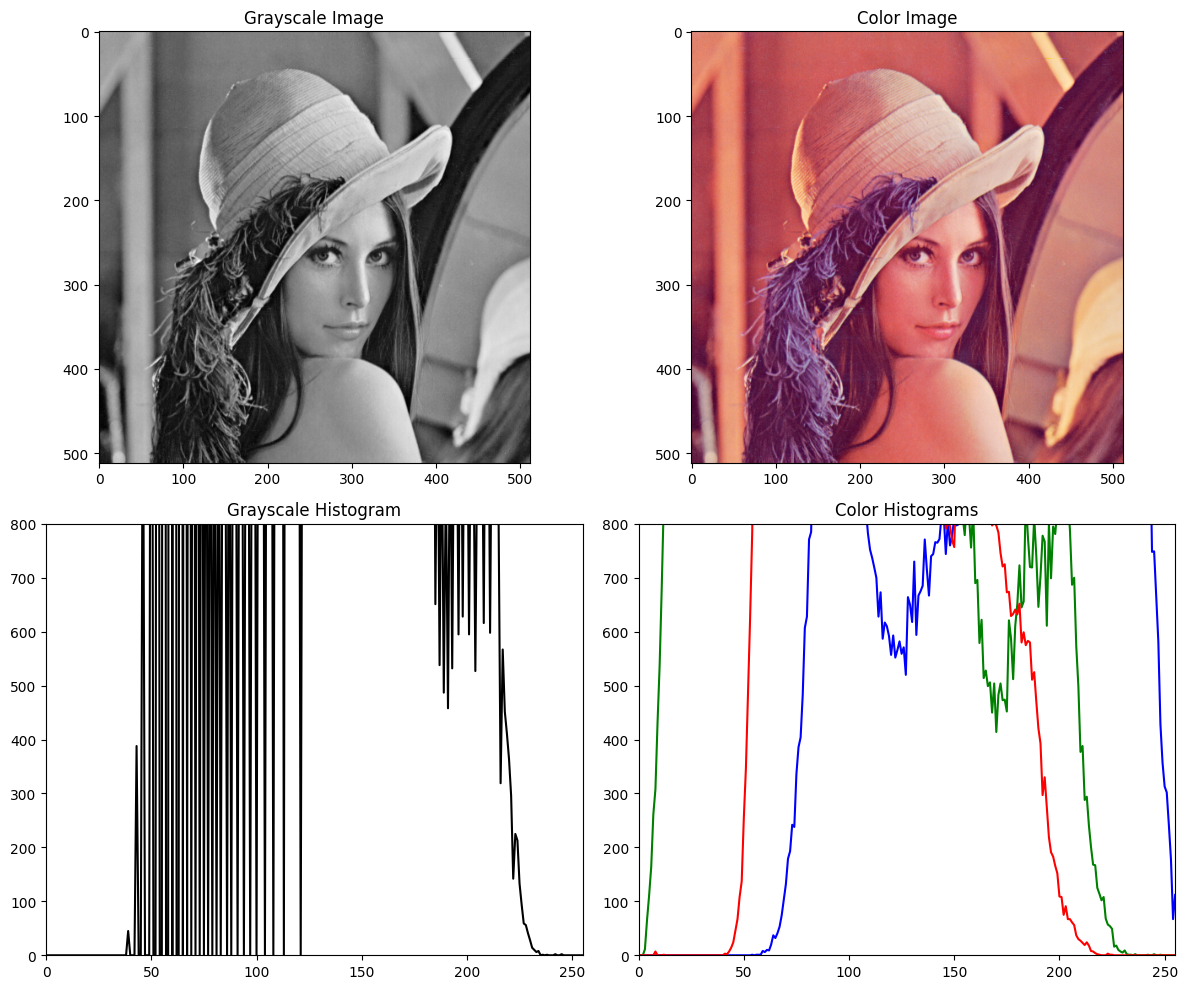

In [1]:
import cv2
import matplotlib.pyplot as plt

# 이미지 읽기
gray_img = cv2.imread('../cv_images/lena_rgb.png', 0)
color_img = cv2.imread('../cv_images/lena_rgb.png')
color_img = cv2.cvtColor(color_img, cv2.COLOR_BGR2RGB)

# 서브플롯 생성
plt.figure(figsize=(12, 10))

# 그레이스케일 이미지 표시
plt.subplot(2, 2, 1)
plt.imshow(gray_img, cmap='gray')
plt.title('Grayscale Image')

# 컬러 이미지 표시
plt.subplot(2, 2, 2)
plt.imshow(color_img)
plt.title('Color Image')

# 그레이스케일 히스토그램
plt.subplot(2, 2, 3)
gray_img_hist = cv2.calcHist([gray_img], [0], None, [256], [0, 256])
plt.plot(gray_img_hist, color='black')
plt.title('Grayscale Histogram')
plt.xlim([0, 255])
plt.ylim([0, 800])  # y축 범위를 0~800으로 고정

# 컬러 히스토그램
plt.subplot(2, 2, 4)
colors = ('b', 'g', 'r')
for i, col in enumerate(colors):
    hist = cv2.calcHist([color_img], [i], None, [256], [0, 256])
    plt.plot(hist, color=col)
plt.title('Color Histograms')
plt.xlim([0, 255])
plt.ylim([0, 800])  # y축 범위를 0~800으로 고정

# 레이아웃 조정 및 화면에 표시
plt.tight_layout()
plt.show()


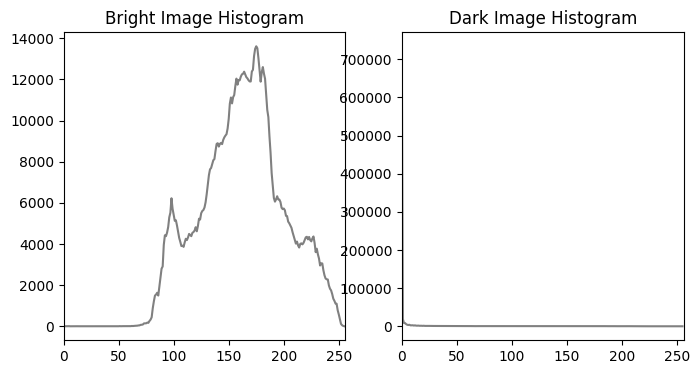

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 두 개의 이미지 불러오기 (밝은 이미지와 어두운 이미지 예시)
bright_img = cv2.imread('../cv_images/bright.jpg')
dark_img   = cv2.imread('../cv_images/dark.png')

# Grayscale 변환
bright_gray = cv2.cvtColor(bright_img, cv2.COLOR_BGR2GRAY)
dark_gray   = cv2.cvtColor(dark_img, cv2.COLOR_BGR2GRAY)

# 히스토그램 계산 (bins=256, range 0~256)
hist_bright = cv2.calcHist([bright_gray], [0], None, [256], [0,256])
hist_dark   = cv2.calcHist([dark_gray], [0], None, [256], [0,256])

# 히스토그램 그래프 그리기
plt.figure(figsize=(8,4))
plt.subplot(1,2,1); 
plt.title('Bright Image Histogram')
plt.plot(hist_bright, color='gray'); 
plt.xlim([0,256])
plt.subplot(1,2,2); plt.title('Dark Image Histogram')
plt.plot(hist_dark, color='gray'); plt.xlim([0,256])
plt.show()


### 사진 노출 분석기 - 사진의 노출 상태를 분석하고 조언

노출 상태: 정상
평균 밝기: 162.7, 표준편차: 37.3
조언: 좋은 노출입니다. 대비가 낮습니다. 조명을 조정해보세요.


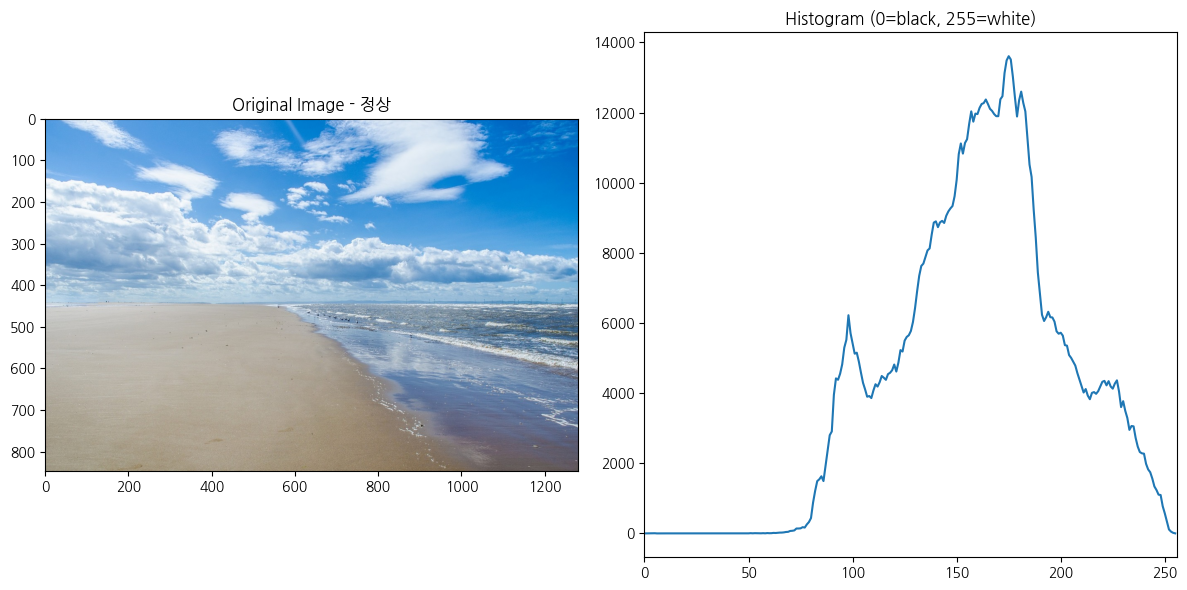

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 이미지 읽기
img = cv2.imread('../cv_images/bright.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 히스토그램 계산
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])

# 노출 분석
mean_brightness = np.mean(gray)
median_brightness = np.median(gray)
std_brightness = np.std(gray)

# 노출 상태 판단
exposure_state = "정상"
advice = "좋은 노출입니다."

if mean_brightness < 80:
    exposure_state = "저노출"
    advice = "더 밝게 촬영하거나 노출 보정이 필요합니다."
elif mean_brightness > 180:
    exposure_state = "과노출"
    advice = "더 어둡게 촬영하거나 노출을 낮추세요."

if std_brightness < 40:
    advice += " 대비가 낮습니다. 조명을 조정해보세요."
elif std_brightness > 80:
    advice += " 대비가 높습니다. 좀 더 부드러운 조명을 사용해보세요."

print(f"노출 상태: {exposure_state}")
print(f"평균 밝기: {mean_brightness:.1f}, 표준편차: {std_brightness:.1f}")
print(f"조언: {advice}")

# 히스토그램 시각화
plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title(f'Original Image - {exposure_state}')
plt.subplot(122), plt.plot(hist), plt.xlim([0, 256])
plt.title('Histogram (0=black, 255=white)')
plt.tight_layout()
plt.show()